In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='whitegrid')

In [2]:
df = pd.read_csv('./train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


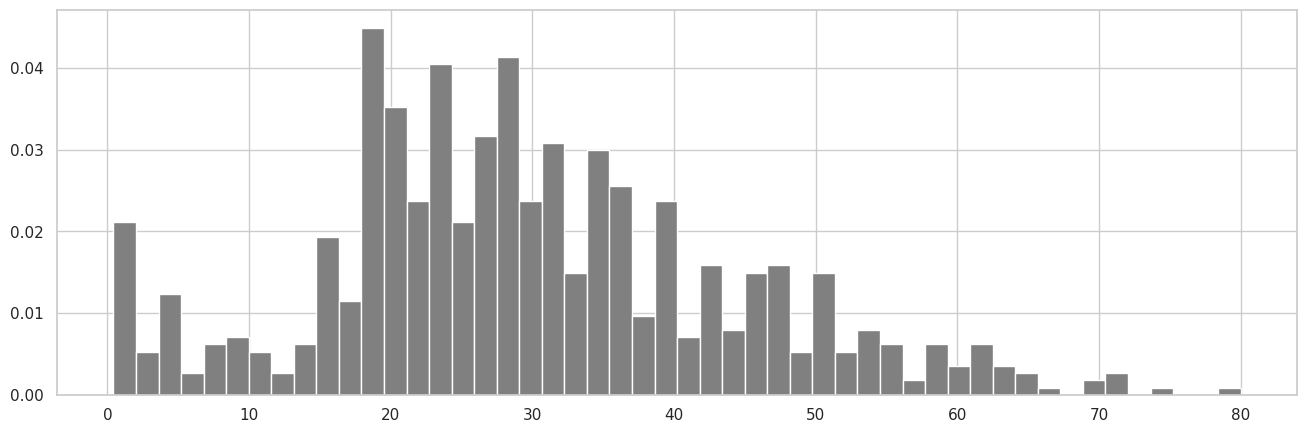

In [4]:
ages = df['Age'].dropna()
plt.figure(figsize=(16,5))
plt.hist(ages, bins=50, density=True, color='gray')
plt.show()

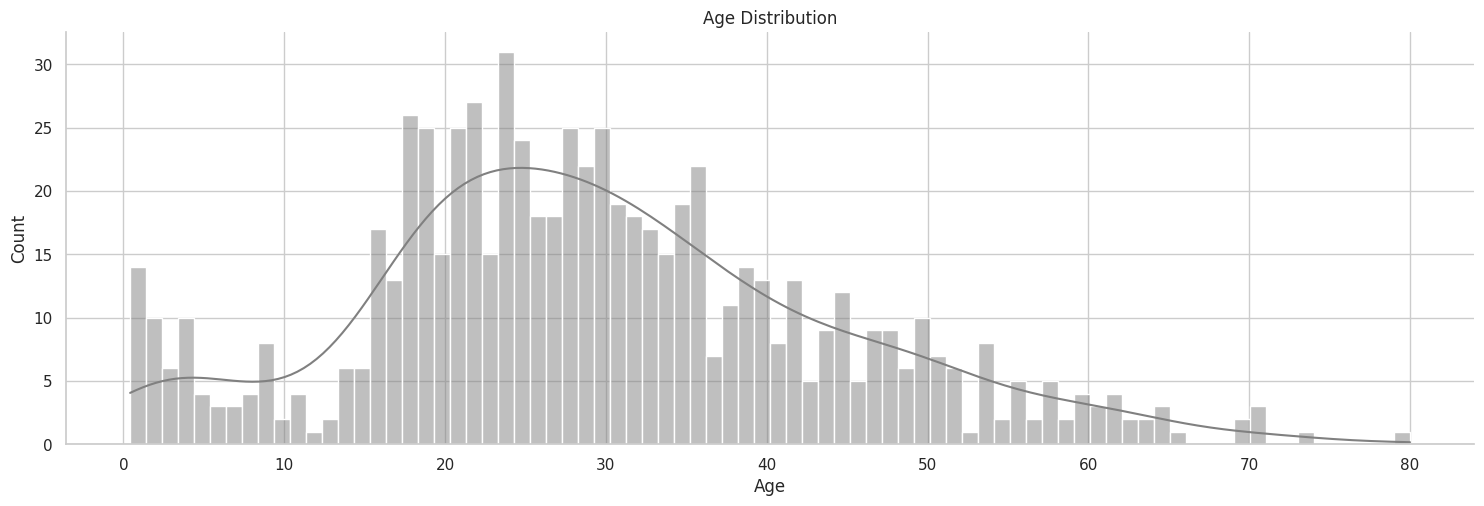

In [5]:
sns.displot(data=df, x='Age', aspect=3, bins=80, color='gray', kde=True)
plt.title('Age Distribution');

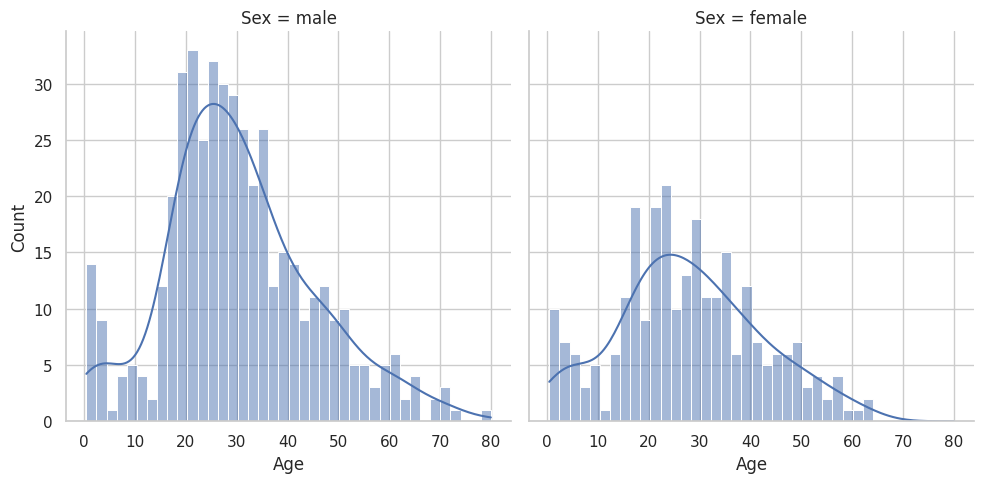

In [6]:
sns.displot(data=df, x='Age', bins=40, col='Sex', kde=True);

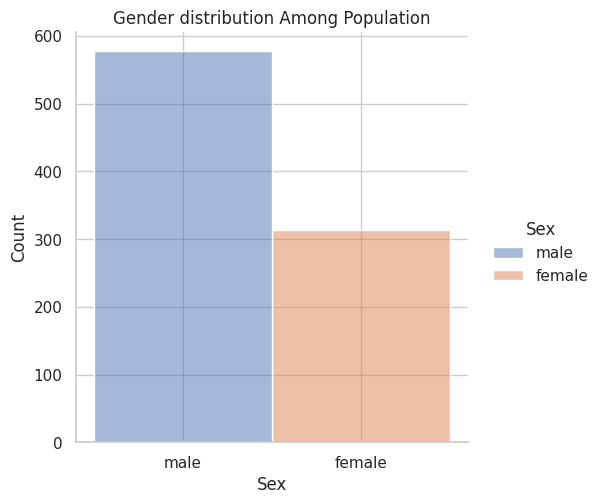

In [7]:
sns.displot(data=df, x='Sex', hue='Sex')
plt.title('Gender distribution Among Population');

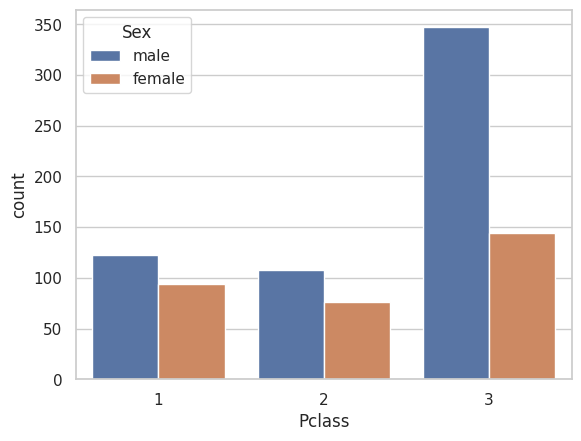

In [8]:
sns.countplot(data=df, x='Pclass', hue='Sex');

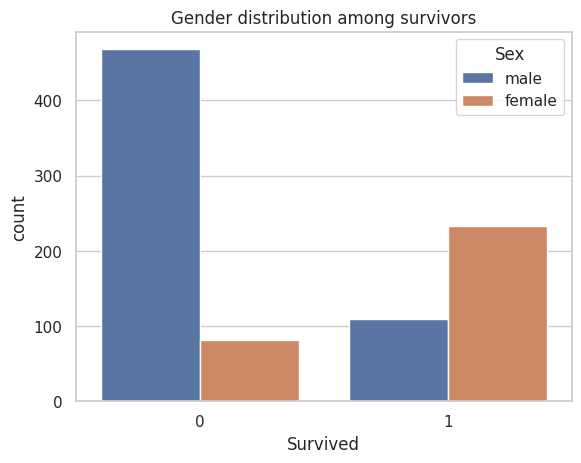

In [9]:
sns.countplot(data=df, x='Survived', hue='Sex').set(title='Gender distribution among survivors');

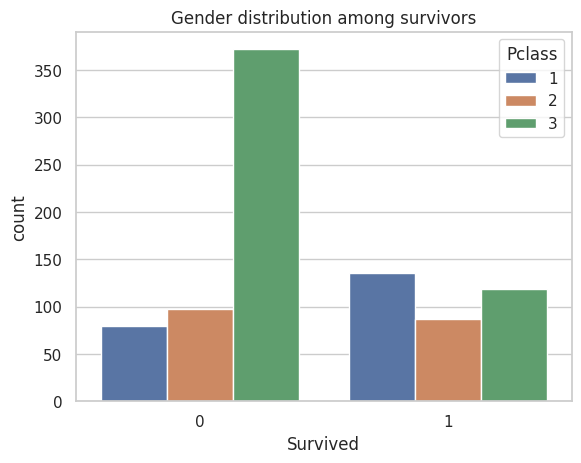

In [10]:
sns.countplot(data=df, x='Survived', hue='Pclass').set(title='Gender distribution among survivors');

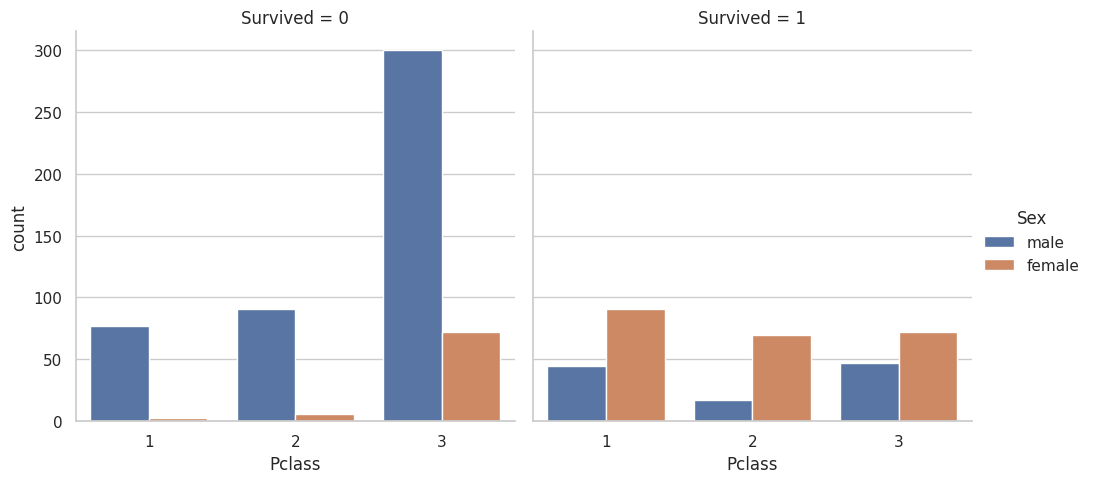

In [11]:
# sns.set(rc={'figure.figsize':(12,2)})
sns.catplot(data=df, x='Pclass', kind='count', col='Survived', hue='Sex');

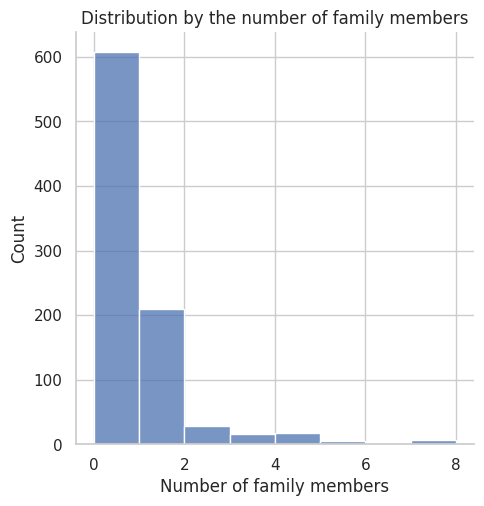

In [12]:
sns.displot(data=df, x='SibSp', bins=8).set(title='Distribution by the number of family members', xlabel='Number of family members');

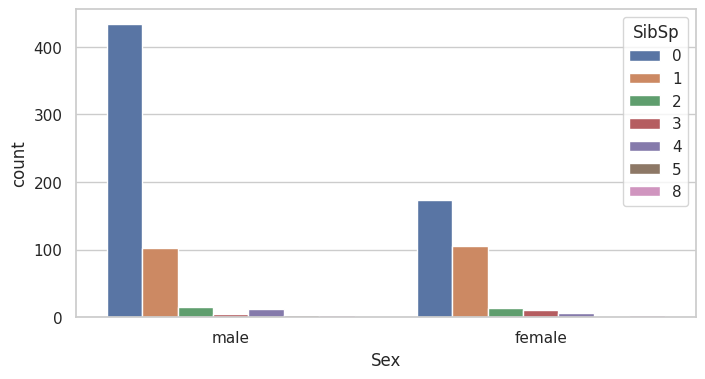

In [13]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Sex', hue='SibSp');

# Preprocessing

In [14]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### O que pode determinar se a pessoa sobreviveu ou não:

- Pclass
- Sex
- Age

#### Talvez:
- Fare
- Cabin

#### Dados desnecessários:
- ticket
- PassangerId
- Name

In [15]:
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [16]:
# drop useless features:

# df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [17]:
names = df['Name'].unique().tolist()
titles_list = ['Mrs', 'Mr', 'Don', 'Jonkheer', 'Master', 'Miss', 'Major', 'Rev', 'Dr', 'Ms', 'Mlle', 'Col', 'Capt', 'Mme', 'Countess']
titles = []

for name in names:
    for title in titles_list:
        if title in name:
            titles.append(title)
    
df['Title'] = pd.Series(titles)

In [18]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Mr
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Miss
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mrs


In [19]:
df['Title'].value_counts()

Mr          558
Miss        165
Mrs         105
Master       30
Dr           10
Col           9
Rev           4
Don           2
Major         2
Mlle          2
Mme           1
Ms            1
Capt          1
Countess      1
Name: Title, dtype: int64

### Replace NaN ages with mean:

In [20]:
female_mean = df[df['Sex']=='female']['Age'].mean()
male_mean = df[df['Sex']=='male']['Age'].mean()
female_mean = round(female_mean)
male_mean = round(male_mean)

In [21]:
# df['Age'] = df[df['Sex']=='male']['Age'].fillna(male_mean)
# df['Age'] = df[df['Sex']=='female']['Age'].fillna(female_mean)


In [22]:
df.loc[(df['Age'].isna()) & (df['Sex'] == 'male'), 'Age'] = male_mean
df.loc[(df['Age'].isna()) & (df['Sex'] == 'female'), 'Age'] = female_mean

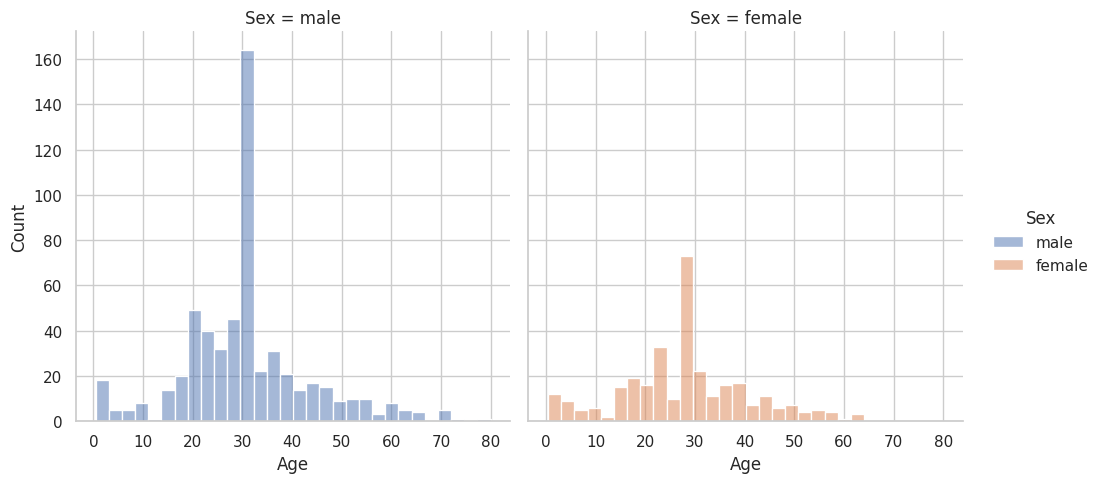

In [23]:
sns.displot(data=df, x='Age', hue='Sex', col='Sex');

In [24]:
df.drop('Cabin', axis=1, inplace=True)

In [25]:
df.drop(['Ticket', 'Name'], axis=1, inplace=True)

In [26]:
df.drop('PassengerId', axis=1, inplace=True)

In [27]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Mr
3,1,1,female,35.0,1,0,53.1000,S,Miss
4,0,3,male,35.0,0,0,8.0500,S,Mrs
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Dr
887,1,1,female,19.0,0,0,30.0000,S,Miss
888,0,3,female,28.0,1,2,23.4500,S,Mr
889,1,1,male,26.0,0,0,30.0000,C,Mr


In [28]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
 8   Title     889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 69.5+ KB


In [29]:
x_train = df.copy()

In [30]:
y_train = x_train.pop('Survived')

In [31]:
x_train = pd.get_dummies(x_train)
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Pclass          889 non-null    int64  
 1   Age             889 non-null    float64
 2   SibSp           889 non-null    int64  
 3   Parch           889 non-null    int64  
 4   Fare            889 non-null    float64
 5   Sex_female      889 non-null    uint8  
 6   Sex_male        889 non-null    uint8  
 7   Embarked_C      889 non-null    uint8  
 8   Embarked_Q      889 non-null    uint8  
 9   Embarked_S      889 non-null    uint8  
 10  Title_Capt      889 non-null    uint8  
 11  Title_Col       889 non-null    uint8  
 12  Title_Countess  889 non-null    uint8  
 13  Title_Don       889 non-null    uint8  
 14  Title_Dr        889 non-null    uint8  
 15  Title_Major     889 non-null    uint8  
 16  Title_Master    889 non-null    uint8  
 17  Title_Miss      889 non-null    uin

# Model Training

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
clf = RandomForestClassifier(max_depth=75, random_state=0)

In [34]:
clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=75, random_state=0)

# Testing

In [35]:
test = pd.read_csv('./test.csv')

In [36]:
names = test['Name'].unique().tolist()
titles = []

for name in names:
    for title in titles_list:
        if title in name:
            titles.append(title)
            
test['Title'] = pd.Series(titles)

In [37]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Mr
3,1,1,female,35.0,1,0,53.1000,S,Miss
4,0,3,male,35.0,0,0,8.0500,S,Mrs


In [38]:
test_male_mean = round(test[test['Sex']=='male']['Age'].mean())
test_female_mean = round(test[test['Sex']=='female']['Age'].mean())

In [39]:
test.loc[test['Age'].isna(), 'Age'] = test_male_mean

In [40]:
test.drop('Cabin', axis=1, inplace=True)

In [41]:
test['Fare'].fillna(test['Fare'].mean(), inplace=True)

In [42]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
 10  Title        418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [43]:
x_test = test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title']]

In [44]:
x_test = pd.get_dummies(x_test)

In [45]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Pclass        418 non-null    int64  
 1   Age           418 non-null    float64
 2   SibSp         418 non-null    int64  
 3   Parch         418 non-null    int64  
 4   Fare          418 non-null    float64
 5   Sex_female    418 non-null    uint8  
 6   Sex_male      418 non-null    uint8  
 7   Embarked_C    418 non-null    uint8  
 8   Embarked_Q    418 non-null    uint8  
 9   Embarked_S    418 non-null    uint8  
 10  Title_Col     418 non-null    uint8  
 11  Title_Don     418 non-null    uint8  
 12  Title_Dr      418 non-null    uint8  
 13  Title_Master  418 non-null    uint8  
 14  Title_Miss    418 non-null    uint8  
 15  Title_Mr      418 non-null    uint8  
 16  Title_Mrs     418 non-null    uint8  
 17  Title_Ms      418 non-null    uint8  
 18  Title_Rev     418 non-null    

In [46]:
all_titles = df['Title'].unique().tolist()
test_titles = test['Title'].unique().tolist()

In [47]:
all_titles

['Mr',
 'Mrs',
 'Miss',
 'Master',
 'Don',
 'Dr',
 'Rev',
 'Col',
 'Mme',
 'Ms',
 'Major',
 'Mlle',
 'Capt',
 'Countess']

In [48]:
for title in all_titles:
    if title not in test_titles:
        print(title)
        x_test['Title_'+str(title)]=0

Mme
Major
Mlle
Capt
Countess


In [49]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Pclass          418 non-null    int64  
 1   Age             418 non-null    float64
 2   SibSp           418 non-null    int64  
 3   Parch           418 non-null    int64  
 4   Fare            418 non-null    float64
 5   Sex_female      418 non-null    uint8  
 6   Sex_male        418 non-null    uint8  
 7   Embarked_C      418 non-null    uint8  
 8   Embarked_Q      418 non-null    uint8  
 9   Embarked_S      418 non-null    uint8  
 10  Title_Col       418 non-null    uint8  
 11  Title_Don       418 non-null    uint8  
 12  Title_Dr        418 non-null    uint8  
 13  Title_Master    418 non-null    uint8  
 14  Title_Miss      418 non-null    uint8  
 15  Title_Mr        418 non-null    uint8  
 16  Title_Mrs       418 non-null    uint8  
 17  Title_Ms        418 non-null    uin

In [51]:
survived = clf.predict(x_test)
survived

/home/johel/.local/lib/python3.10/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

# Submission file:

In [53]:
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': survived})

In [56]:
output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [57]:
output.to_csv('Submission_RandomForest.csv', index=False)